<a href="https://colab.research.google.com/github/Bee-Chang/Machine-Learning-Projects/blob/main/SUV_Purchase_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SUV purchase - there are three independent variables: gender, age, EstimatedSalary
#and one dependent variable - purchased(1) or not(0).

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data_set=pd.read_csv('suv_purchase.csv')
data_set

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,male,15,15000,0
1,15810944,male,35,20000,0
2,15668575,female,26,43000,0
3,15603246,female,27,57000,0
4,15804002,male,19,76000,0
5,15728773,male,27,58000,0
6,15598044,female,27,84000,0
7,15694829,female,32,150000,1
8,15600575,male,25,33000,0
9,15727311,female,35,65000,0


In [ ]:
le = LabelEncoder()
label = le.fit_transform(data_set['Gender'])
data_set.drop('Gender',axis=1, inplace=True)
data_set['Gender'] = label

Text(0.5, 1.0, 'Correlation between different fearures')

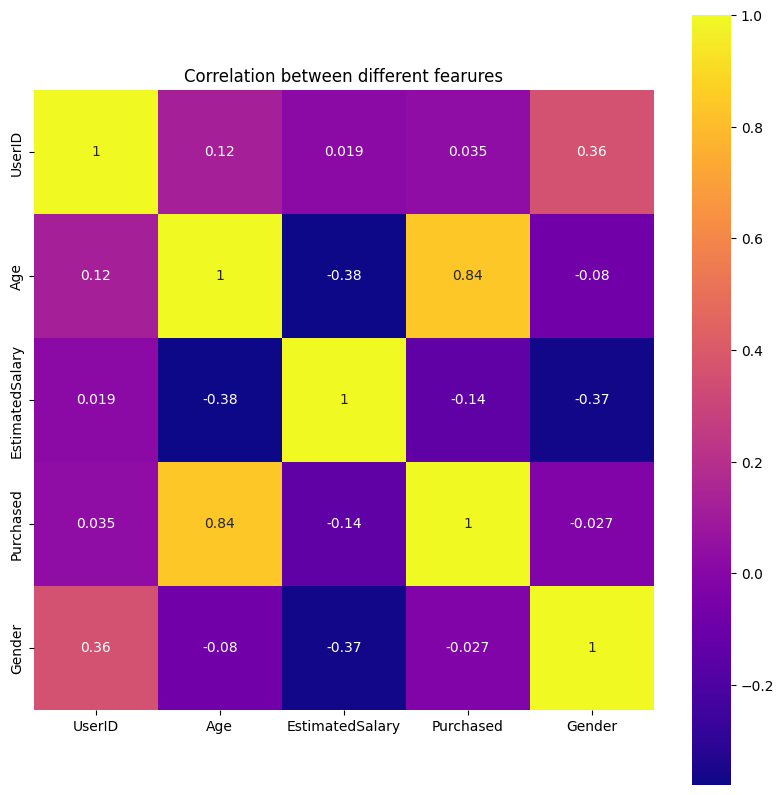

In [ ]:
correlation = data_set.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='plasma')

plt.title('Correlation between different fearures')

In [ ]:
#'age' (column#2)and 'EstimatedSalary'(column#3) are the two independent variables 
#and 'purchased'(column#4) is the dependent variable
x=data_set.iloc[:,[1,2,3]].values
y=data_set.iloc[:,4].values


In [ ]:
#splitting the dataset into training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

In [ ]:

from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)


In [ ]:
#fitting logistic regression to the training set

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#For more info on the LogitsticRegression and its parameters, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#andom_state: Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. 
#Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter, e.g. shuffle, being set.
#The passed value will have an effect on the reproducibility of the results returned by the function

LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(C=1.0,class_weight=None, dual=False,fit_intercept=True,
                   intercept_scaling=1,l1_ratio=None, max_iter=100,
                   multi_class='warn',n_jobs=None,penalty=12,
                   random_state=0,solver='warn',tol=0.0001,verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty=12, random_state=0,
                   solver='warn')

In [ ]:
#predicting the test set result
y_pred=classifier.predict(x_test)


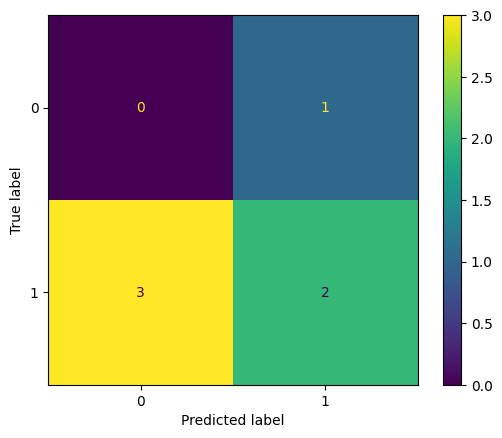

In [ ]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that 4+2= 6 (Correct Output) and 0+0= 0(Incorrect Output).